In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid")

In [2]:
# Read data
# Lectura del dataset usando como index la primera columna
df = pd.read_csv('properatti_geo.csv', index_col='id')
df.drop(['Unnamed: 0', 'piso', 'habs', 'expensas', 'descripcion', 'ambientes'], axis=1, inplace=True)

In [3]:
df.head()

,barrio_real,total,cubierta,precio,habitaciones_final,pileta,seguridad,parrilla,balcon,cochera,nuevo,geometry,dist_comisarias,dist_subte,dist_trenes,dist_metrobus
id,,,,,,,,,,,,,,,,
2,LINIERS,55.0,55.0,1309.090909,2.0,0,0,0,0,0,0,POINT (-58.5229825 -34.6522615),2133.629728,5444.155315,1512.704661,1578.836380
7,BELGRANO,45.0,40.0,3066.666667,1.0,1,0,0,0,0,0,POINT (-58.443362 -34.5598729),564.095028,1068.595967,585.038122,1019.907337
8,BELGRANO,65.0,60.0,3000.000000,2.0,1,0,0,0,0,0,POINT (-58.443362 -34.5598729),564.095028,1068.595967,585.038122,1019.907337
19,PALERMO,104.0,96.0,3365.384615,3.0,0,0,0,1,0,0,POINT (-58.4058744847 -34.580503566),719.300376,991.604946,794.459912,1500.489635
21,RECOLETA,118.0,73.0,2292.372881,4.0,0,0,0,0,0,0,POINT (-58.4116653 -34.590926),527.672388,300.233682,1938.001717,1494.307836


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15924 entries, 2 to 121217
Data columns (total 16 columns):
barrio_real           15924 non-null object
total                 15924 non-null float64
cubierta              15467 non-null float64
precio                15924 non-null float64
habitaciones_final    14471 non-null float64
pileta                15924 non-null int64
seguridad             15924 non-null int64
parrilla              15924 non-null int64
balcon                15924 non-null int64
cochera               15924 non-null int64
nuevo                 15924 non-null int64
geometry              15924 non-null object
dist_comisarias       15924 non-null float64
dist_subte            15924 non-null float64
dist_trenes           15924 non-null float64
dist_metrobus         15924 non-null float64
dtypes: float64(8), int64(6), object(2)
memory usage: 2.1+ MB


## CONSULTAS

Las variables pileta, seguridad, parrilla, balcon, cochera, nuevo; tienen influencia en el precio?

/home/s/anaconda3/envs/geopandas/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


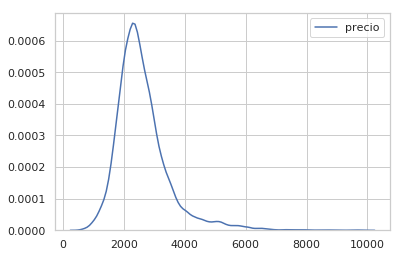

In [22]:
sns.kdeplot(df['precio'])

In [36]:
import scipy.stats as sps


Ttest_indResult(statistic=-46.447349299908026, pvalue=0.0)

In [50]:
sps.ttest_ind(df.loc[df['pileta']==1,'precio'],df.loc[df['pileta']==0,'precio'], equal_var=False)

Ttest_indResult(statistic=36.79656284357395, pvalue=9.246333778768748e-260)

In [51]:
sps.ttest_ind(df.loc[df['seguridad']==1,'precio'],df.loc[df['seguridad']==0,'precio'], equal_var=False)

Ttest_indResult(statistic=27.208287884394593, pvalue=3.4047681971870283e-149)

In [52]:
sps.ttest_ind(df.loc[df['parrilla']==1,'precio'],df.loc[df['parrilla']==0,'precio'], equal_var=False)

Ttest_indResult(statistic=11.749109750308518, pvalue=1.4470546066705106e-31)

In [53]:
sps.ttest_ind(df.loc[df['balcon']==1,'precio'],df.loc[df['balcon']==0,'precio'], equal_var=False)

Ttest_indResult(statistic=3.5791449125845687, pvalue=0.0003458232634552294)

In [54]:
sps.ttest_ind(df.loc[df['cochera']==1,'precio'],df.loc[df['cochera']==0,'precio'], equal_var=False)

Ttest_indResult(statistic=31.433596004115735, pvalue=3.4514066692180394e-207)

In [55]:
sps.ttest_ind(df.loc[df['nuevo']==1,'precio'],df.loc[df['nuevo']==0,'precio'], equal_var=False)

Ttest_indResult(statistic=-1.3914186328195828, pvalue=0.16420584511615155)

Conclusión: ``nuevo`` no es estadísticamente significativo (y apunta en la dirección incorrecta), los demás sí

Veamos ahora sobre las columnas geográficas (dist_comisarias, dist_subte, dist_trenes, y dist_metrobus)

In [56]:
sps.linregress(df['precio'], df['dist_comisarias'])

LinregressResult(slope=-0.017866818940336742, intercept=701.2317283656018, rvalue=-0.045461481807582194, pvalue=9.505948060144632e-09, stderr=0.003111398131272282)

In [57]:
sps.linregress(df['precio'], df['dist_subte'])

LinregressResult(slope=-0.10460962966036355, intercept=1075.762923524178, rvalue=-0.10655853862972875, pvalue=1.9426498577951754e-41, stderr=0.007735793126100746)

In [58]:
sps.linregress(df['precio'], df['dist_trenes'])

LinregressResult(slope=-0.07696515145264951, intercept=1156.3844600350244, rvalue=-0.13667816987360043, pvalue=2.9184439910384587e-67, stderr=0.004420804245234533)

In [59]:
sps.linregress(df['precio'], df['dist_metrobus'])

LinregressResult(slope=-0.061160887172394464, intercept=1236.6399291667146, rvalue=-0.07382673140247059, pvalue=1.07664381853407e-20, stderr=0.0065474856048040415)

Todas las pendientes dan negativas y los p-valores son chicos